### Day 2 time series
1. Simple moving Average (Excel + coding)
2. cumulative moving average  (excel +coding)
3. Exponential weight moving average (excel +coding)
4. Moving Average (formula) ->ACF auto correlation plot (MA model)
5. Autoregressive model --> PACF (AR model)
If we combine MA and AR model it will become ARMA model

In [2]:
!pip install pandas_datareader

     -------------------------------------- 109.5/109.5 kB 1.3 MB/s eta 0:00:00


In [3]:
import pandas_datareader as pdr
import pandas as pd
from datetime import datetime

In [5]:
df_tesla = pdr.get_data_yahoo('TSLA')
df_tesla

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-08-25,71.138000,69.459999,70.848000,69.610001,17420000.0,69.610001
2017-08-28,69.470001,67.944000,69.456001,69.132004,18820000.0,69.132004
2017-08-29,69.809998,67.750000,67.896004,69.472000,20368500.0,69.472000
2017-08-30,70.694000,69.400002,69.933998,70.636002,17064500.0,70.636002
2017-08-31,71.688004,70.564003,70.709999,71.180000,20364000.0,71.180000
...,...,...,...,...,...,...
2022-08-18,919.500000,905.559998,918.000000,908.609985,15833500.0,908.609985
2022-08-19,901.080017,877.500000,897.000000,890.000000,20417900.0,890.000000
2022-08-22,877.200012,858.890015,875.739990,869.739990,18614400.0,869.739990


<AxesSubplot:xlabel='Date'>

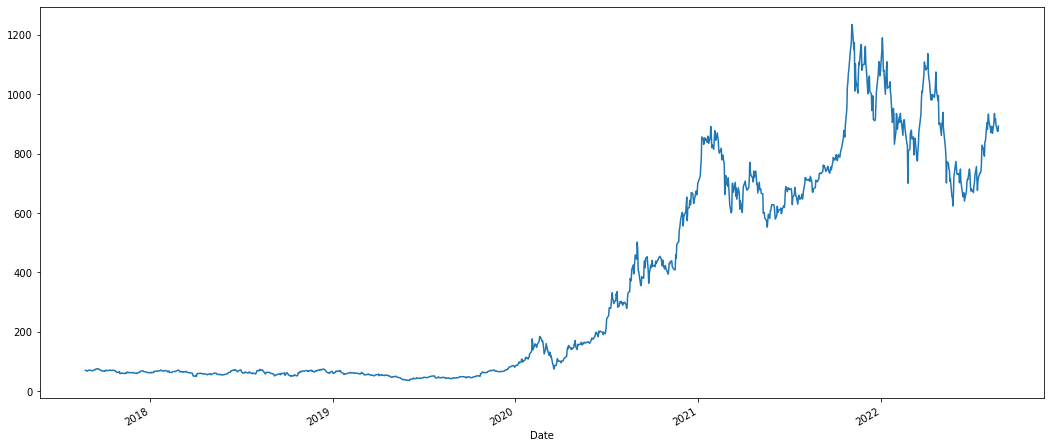

In [22]:
#Simple moving average  --->It smoothning the graph
df_tesla['Open'].plot(kind='line',figsize=(18,8))

In [23]:
df_tesla['open:10dys rolling'] = df_tesla['Open'].rolling(window=10, min_periods=1).mean()
#window =10, min_period =1

<AxesSubplot:xlabel='Date'>

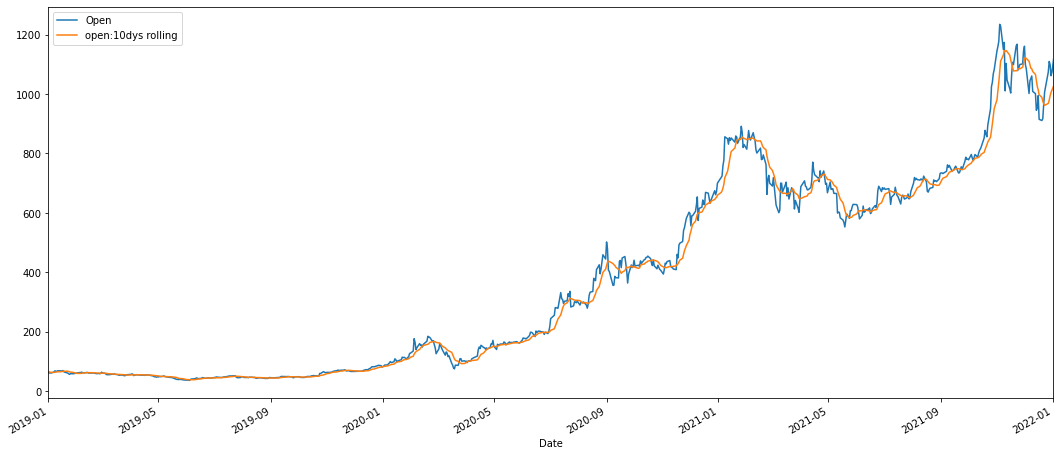

In [27]:
df_tesla[['Open','open:10dys rolling']].plot(xlim=['2019-01-01','2022-01-01'], figsize=(18,8))
          
          #We got the simple moving average
          #This helps most of the time in stock market

In [28]:
#Lets create more rolling windows
df_tesla['open:20dys rolling'] = df_tesla['Open'].rolling(window=20, min_periods=1).mean()

df_tesla['open:30dys rolling'] = df_tesla['Open'].rolling(window=30, min_periods=1).mean()

df_tesla['open:50dys rolling'] = df_tesla['Open'].rolling(window=50, min_periods=1).mean()


<AxesSubplot:xlabel='Date'>

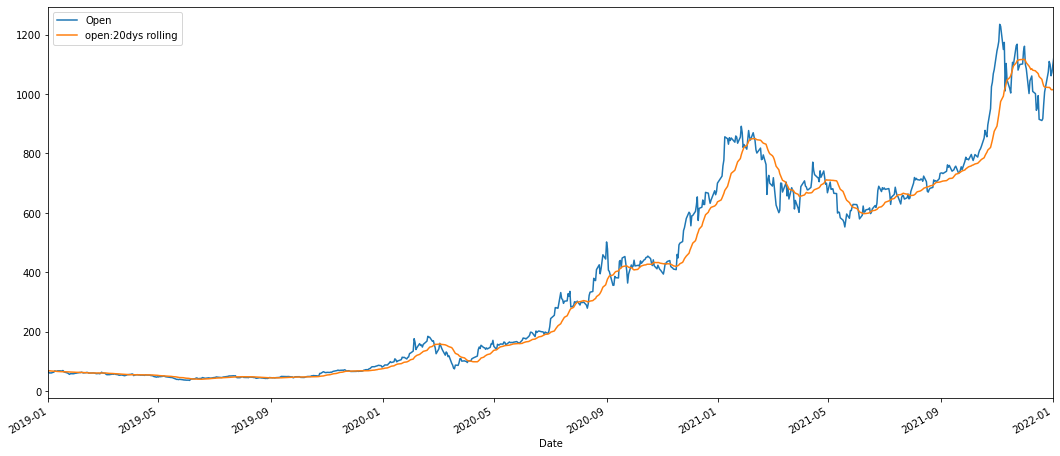

In [30]:
df_tesla[['Open','open:20dys rolling']].plot(xlim=['2019-01-01','2022-01-01'], figsize=(18,8))


<AxesSubplot:xlabel='Date'>

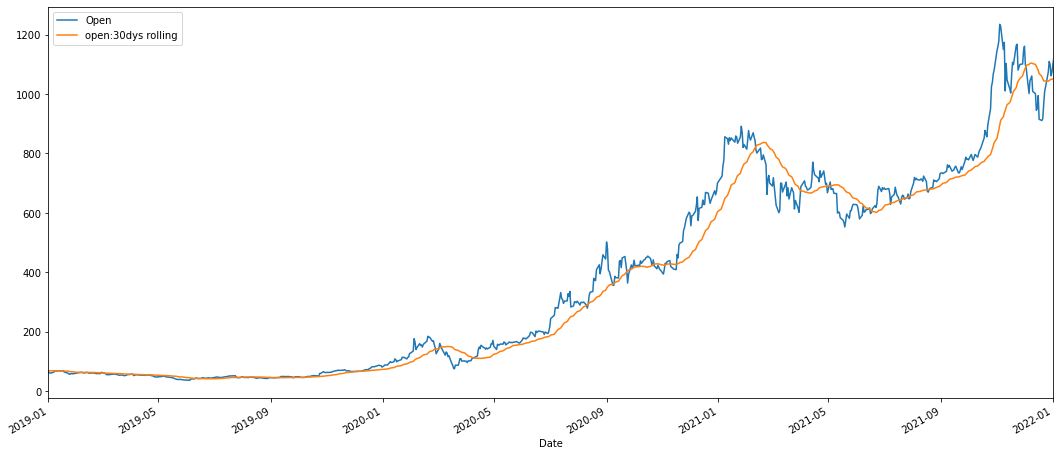

In [32]:
df_tesla[['Open','open:30dys rolling']].plot(xlim=['2019-01-01','2022-01-01'], figsize=(18,8))


<AxesSubplot:xlabel='Date'>

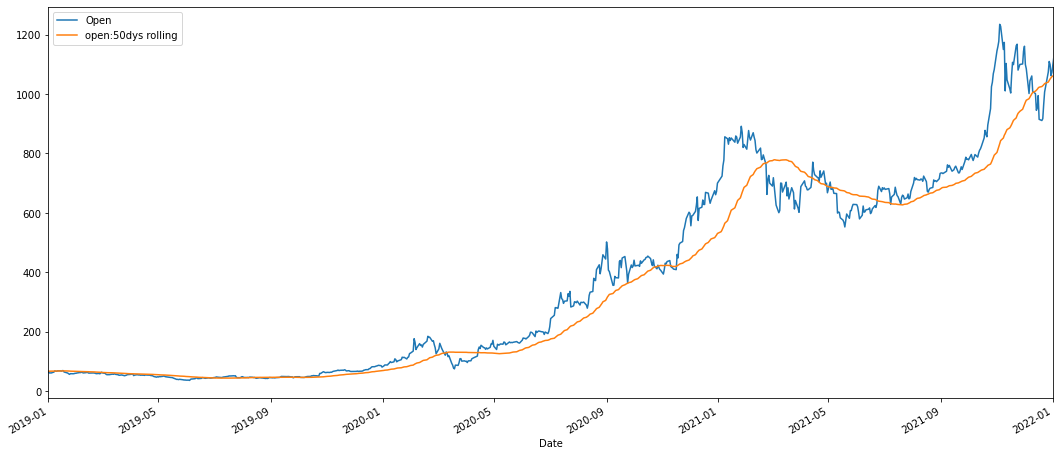

In [29]:
df_tesla[['Open','open:50dys rolling']].plot(xlim=['2019-01-01','2022-01-01'], figsize=(18,8))


<AxesSubplot:xlabel='Date'>

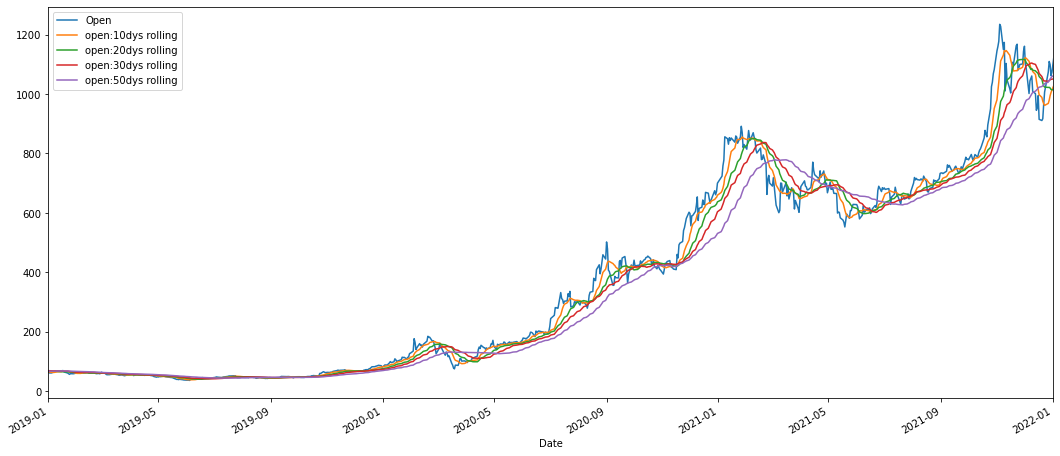

In [33]:
df_tesla[['Open','open:10dys rolling','open:20dys rolling','open:30dys rolling','open:50dys rolling']].plot(xlim=['2019-01-01','2022-01-01'], figsize=(18,8))


In [ ]:
#Disadvantage of the simple moving average
#We have given the similar weightage for all the data points
#In Time series data we need to give more weitage for the recent time data since it's important

<AxesSubplot:xlabel='Date'>

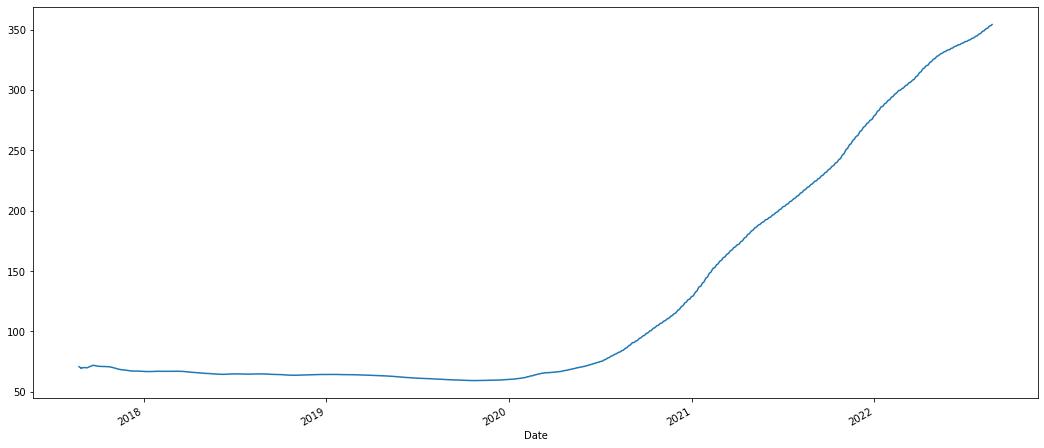

In [34]:
#For Cummulative moving average we use expanding

df_tesla['Open'].expanding().mean().plot(figsize=(18,8))
#This is the cummulative moving average of the open of the tesla stock

In [35]:
#Exponentional moving average EMA
#Smootinging parameter is 0.1
df_tesla['EMA'] = df_tesla['Open'].ewm(alpha=0.1, adjust=False).mean()

<AxesSubplot:xlabel='Date'>

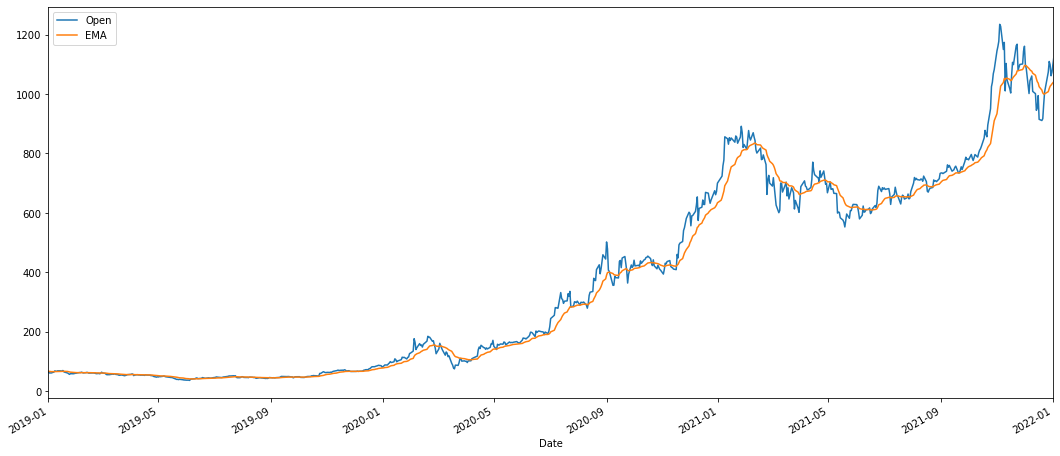

In [36]:
df_tesla[['Open','EMA']].plot(xlim=['2019-01-01','2022-01-01'], figsize=(18,8))


<AxesSubplot:xlabel='Date'>

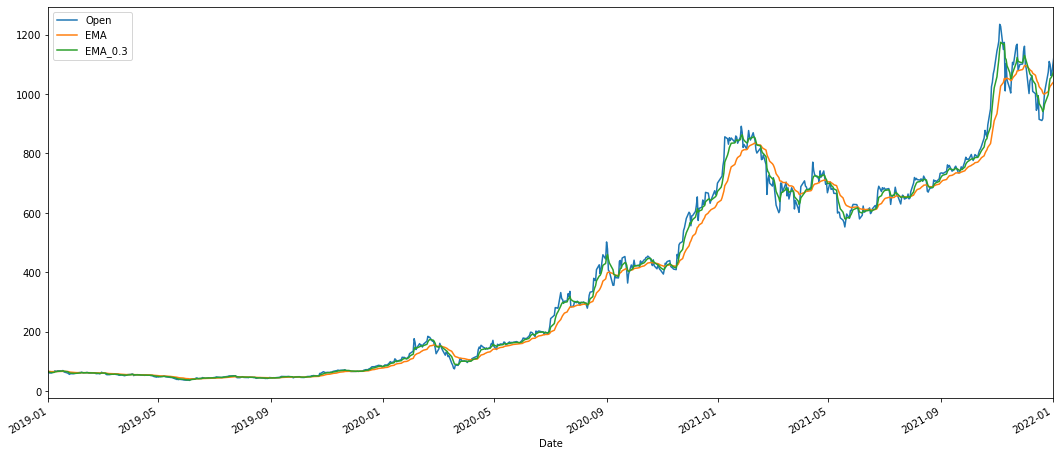

In [38]:
df_tesla[['Open','EMA','EMA_0.3']].plot(xlim=['2019-01-01','2022-01-01'], figsize=(18,8))


In [41]:
#Exponential weighted moving average -->EWMA

#Our focus is on recent data and upcomming data

#For exponential weighted moving average we use span 

df_tesla['EWMA_5'] = df_tesla['Open'].ewm(span=5).mean()

<AxesSubplot:xlabel='Date'>

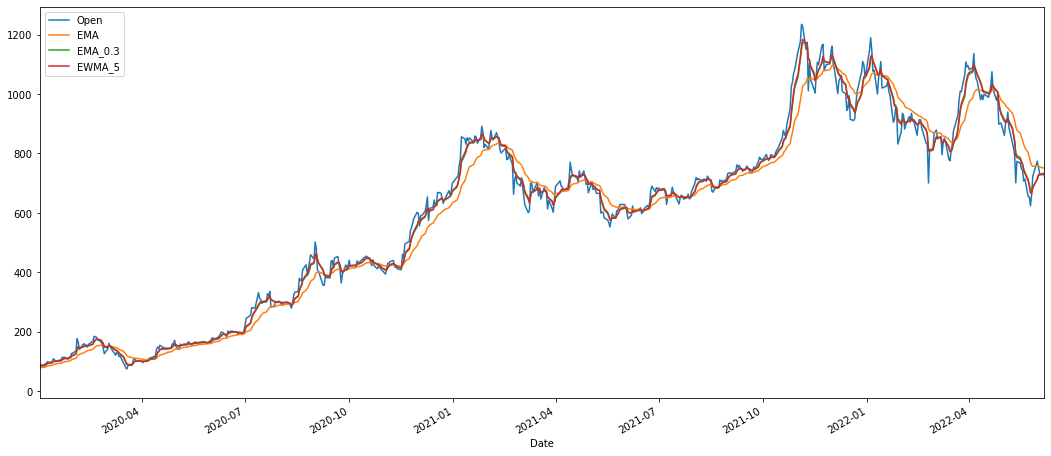

In [46]:
df_tesla[['Open','EMA','EMA_0.3','EWMA_5']].plot(figsize=(18,8),xlim=('2020-01-02','2022-06-06'))

In [ ]:
#Exponential weighted moving average is best compare to moving average model

In [ ]:
ARIMA --> AR   I  MA

AR--> Auto regression 
MA --> Moving Average
ARMA model ---> This helps in sales in months.               

Interview question:
Where is PACF is used and where ACF  used ?
Where is PACF is used : gives the partial correlation of a stationary time series with its own lagged values, regressed the values of the time series at all shorter lags.